## Skin Cancer Data Analysis

* According to American academy of Dermatology Association, Skin cancer is the most common cancer in the United States.
* The Association also note that skin cancer can affect anyone regardless of color.
* We will analyse the data to determine 
* 1. Between male and female which gender is at greater risk
* 2. What are the general anatomical parts generally affected by skin Cancer
* 3. Identify which type of skin cell cancer is more prevelance and to which gender if not both equally.

## Legend
* The analysis includes the abbreviation of diagnosis of skin carcinoma
* nv - melanocytic nevi
* mel - Melanoma
* bkl - benign keratosis-like lesions
* bcc  - Basal cell carcinoma
* akiec - actinic keratoses and intraepithelial carcinoma
* vasc - vascular lesions
* df  - dermatofibroma

## Hypothesis

- localization v sex
- localization v aage
- localization v dx
- localization v dx_type











In [1]:
# import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress


In [2]:
#import and read csv file

skin_cancer_df = pd.read_csv('HAM10000_metadata.csv')
skin_cancer_df.count()

lesion_id       10015
image_id        10015
dx              10015
dx_type         10015
age              9958
sex             10015
localization    10015
dtype: int64

In [3]:
#clean df
#drop nan value and drop unknown
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
#clean_skin_df = clean_skin_df.loc[clean_skin_df['sex'] != 'unknown']
clean_skin_df.count()

lesion_id       9958
image_id        9958
dx              9958
dx_type         9958
age             9958
sex             9958
localization    9958
dtype: int64

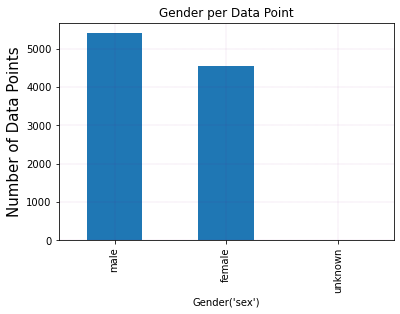

In [4]:
#bar plot to visualize the relationship of the data in reference to sex(gender)
clean_skin_df['sex'].value_counts().plot(kind='bar')
plt.xlabel("Gender('sex')")
plt.ylabel("Number of Data Points", size=15)
plt.title("Gender per Data Point")
plt.grid(color = 'purple', linestyle = '--', linewidth = 0.1)
plt.show()

In [5]:
# Create a clean dataframe by removing unkown gender from the dataframe
# Comparing the previous clean_df gender(sex) had 10 unknowns.
clean_skin_df = skin_cancer_df.dropna(axis= 'rows')
clean_skin_df = clean_skin_df.loc[clean_skin_df['sex'] != 'unknown']
clean_skin_df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [6]:
#create new dataframe from clean df for dignosis using dx column values
dx_clean_df = pd.DataFrame(clean_skin_df, columns = ['dx'])
dx_clean_df = dx_clean_df['dx'].value_counts()
print(dx_clean_df)

nv       6650
mel      1111
bkl      1089
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


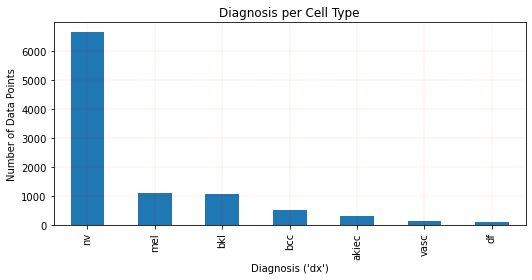

In [7]:
#plot a bar graph to show the different type of skin cancer cells
dx_clean_df.plot(kind="bar",figsize=(7.5,4))
plt.xlabel("Diagnosis ('dx')")
plt.ylabel("Number of Data Points")
plt.title("Diagnosis per Cell Type")
plt.tight_layout()
plt.grid(color = 'r', linestyle = '--', linewidth = 0.1)

In [8]:
#create another dataframe from clean df for affected bogy anatomy using the localization column values
loca_clean_df = pd.DataFrame(clean_skin_df, columns = ['localization'])

loca_clean_df = loca_clean_df['localization'].value_counts()
print(loca_clean_df)

back               2190
lower extremity    2077
trunk              1400
upper extremity    1116
abdomen            1019
face                743
chest               405
foot                314
unknown             187
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64


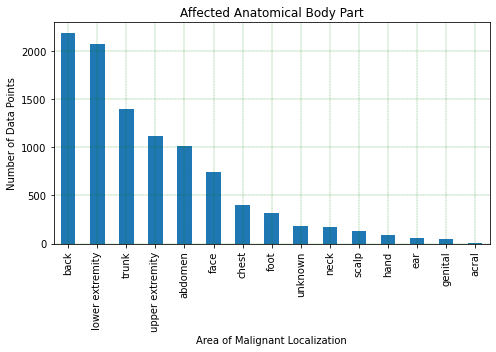

In [11]:
#bar plot for localization
loca_clean_df.plot(kind="bar",figsize=(7,5))
#loca_clean_df.groupby('localization')['age'].value_counts().unstack(0).plot.bar(figsize=(20,12))
# plt.title('Age Groups vs. Sex')
# plt.xlabel('Age Groups')
# plt.ylabel('Sex')
# plt.rcParams.update({'font.size': 25})


# plt.show()
plt.xlabel("Area of Malignant Localization")
plt.ylabel("Number of Data Points")
plt.title("Affected Anatomical Body Part")
plt.tight_layout()
plt.grid(color = 'g', linestyle = '--', linewidth = 0.3)
#print(f' The plot clearly demonstrate that a significant # of people have a higher chance of getting skin cancer on 
#       'the back, lower extremity,truck  ')

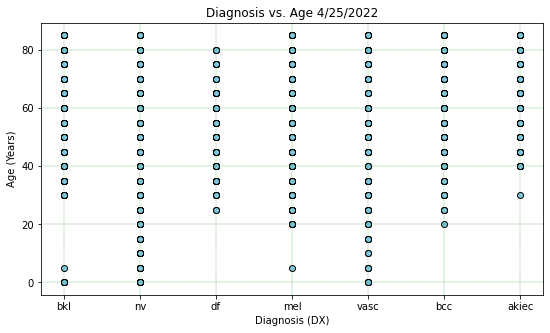

 This comparison shows that the chances of having skin cancer inceases with age for all the different dx


In [12]:
#scatter plot for diagnosis (dx) vs Age for both genders
plt.figure(figsize=(9,5))
plt.scatter(clean_skin_df["dx"],clean_skin_df["age"],marker='o', edgecolors="black",facecolors="skyblue")
plt.title("Diagnosis vs. Age" " ""4/25/2022")
plt.xlabel("Diagnosis (DX)")
plt.ylabel("Age (Years)")
plt.grid(color = 'g', linestyle = '--', linewidth = 0.3)
#plt.savefig('fig1_2022.png')
plt.show()
print(f' This comparison shows that the chances of having skin cancer inceases with age for all the different dx')

In [13]:
#create a male only dataframe
df_male = clean_skin_df.loc[clean_skin_df['sex'] == 'male']
df_dx = clean_skin_df.loc[clean_skin_df['dx'].values == 'bkl']
#df_male.head()
df_dx
# df['M'] = df.loc[df['gender'] == 'E', 'gender']

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
3326,HAM_0002276,ISIC_0025366,bkl,consensus,50.0,female,trunk
7100,HAM_0006159,ISIC_0028977,bkl,consensus,50.0,female,upper extremity
9546,HAM_0003807,ISIC_0032655,bkl,consensus,40.0,male,unknown
9630,HAM_0003807,ISIC_0033620,bkl,consensus,40.0,male,unknown
